<ipython-input-1-89eb1196295b>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['boh'] = filtered_df['age'].apply(assign_value_boh)
C:\Users\varun\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


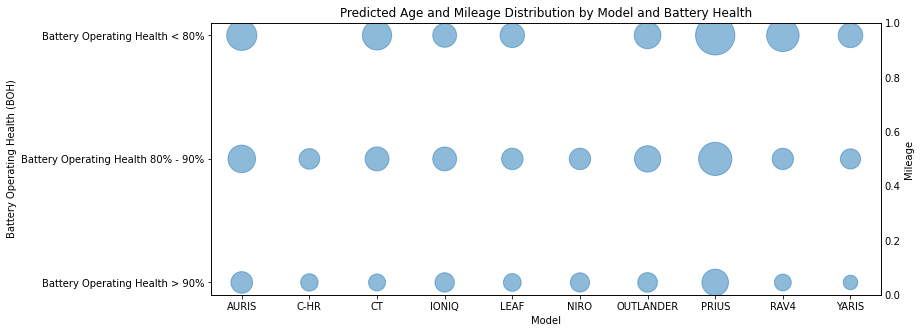

In [1]:

######### 3_5 Predicted Age and Mileage Distribution b Model and Battery Health  #########

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Manually replace the file path
csv_url = 'C:/Users/samar/Downloads/dft_test_result_2022/test_result.csv'
df = pd.read_csv(csv_url, delimiter = '|', error_bad_lines=False)
df = df[df['fuel_type'].isin(['EL', 'Electric', 'HY' , 'Hybrid Electric (Clean)'])]
# calculating age
df['present'] = df['test_date'].str[-4:]
df['present'] = pd.to_numeric(df['present'], errors='coerce')
df['start'] = df['first_use_date'].str[-4:]
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['age'] = df['present'] - df['start']
# Define a function to check if the value is less than 8 and return 1, otherwise 0
def assign_value_less_80(x):
    return 1 if x > 8 else 0
df['boh_below_80'] = df['age'].apply(assign_value_less_80)
def assign_value_80_90(x):
    return 1 if 5 <= x <= 8 else 0
df['boh_80-90'] = df['age'].apply(assign_value_80_90)
def assign_value_above_90(x):
    return 1 if x < 5 else 0
df['boh_above_90'] = df['age'].apply(assign_value_above_90)
# Calculate the counts of each string in the column
string_counts = df['model'].value_counts()
df['model_count'] = df['model'].map(string_counts)
ma_count = df['make'].value_counts()
df['make_count'] = df['make'].map(ma_count)
columns_to_drop = [0,1,3,4,5,7,10]
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)
# print(df.head(10))

# Manually enter top 10 models as it is mentioned in the data
top_ten_models = ['PRIUS', 'YARIS', 'AURIS', 'OUTLANDER', 'C-HR', 'LEAF', 'CT', 'RAV4', 'IONIQ', 'NIRO']

# Filter the DataFrame to include only rows with 'column_name' matching the strings in 'strings_to_filter'
filtered_df = df[df['model'].isin(top_ten_models)]

############################################################################
##### 3_5 Predicted Age and Mileage Distribution b Model and Battery Health #####

def assign_value_boh(x):
    if x > 8:
        return 3
    elif 5 <= x <= 8:
        return 2
    else:
        return 1

# Apply the function to create the 'boh' column
filtered_df['boh'] = filtered_df['age'].apply(assign_value_boh)

columns_to_drop_2 = [0,2,4,5,6,7,8,9,10,11,12,13,14]
filtered_df.drop(filtered_df.columns[columns_to_drop_2], axis=1, inplace=True)
# print(filtered_df)

# Calculate the average of 'value' for each group of 'x_axis' and 'y_axis'
averages = filtered_df.groupby(['model', 'boh'])['test_mileage'].mean().reset_index()
# Create a bubble plot
plt.figure(figsize=(12, 5))
plt.scatter(averages['model'], averages['boh'], s=averages['test_mileage']*0.01, alpha=0.5)
# Add labels and title
plt.xlabel('Model')
plt.ylabel('Battery Operating Health (BOH)')
plt.title('Predicted Age and Mileage Distribution by Model and Battery Health')
# Customize y-axis tick labels
plt.yticks([1, 2, 3], ["Battery Operating Health > 90%", "Battery Operating Health 80% - 90%", "Battery Operating Health < 80%"])
# Create a secondary (right) y-axis for mileage
ax2 = plt.twinx()
ax2.set_ylabel('Mileage')
# Hide y-axis tick marks
plt.tick_params(axis='y', which='both', length=0)
# Show the plot
plt.show()

############################################################################
